<a href="https://colab.research.google.com/github/Emahai/NLP/blob/main/NLP_Assignment_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Assignment I**
This assignment is prepared by:


1.   Awol Alebe (GSR 2164/17)
2.   Emanda Hailu (GSR 5056/17)



In [ ]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import math
import random

In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 14.1 MB/s eta 0:00:00


In [ ]:
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Load corpus**

In [ ]:
import re

tokens = []

with open("/content/GPAC.txt", "r", encoding="utf-8", errors="ignore") as f:
    for chunk in f:
        chunk_tokens = re.findall(r"[\u1200-\u137F]+", chunk)
        tokens.extend(chunk_tokens)

len(tokens)


12254365

## **Tokenization**

In [ ]:
print(tokens[:50])


['ምን', 'መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው', 'ያልቻለችው', 'የአለም', 'የእግር', 'ኳስ', 'ዋ', 'ለ', 'ኛ', 'ጊዜ', 'በደቡብ', 'አፍሪካ', 'ሲጠጣ፣', 'በሩቅ', 'እያየች', 'አንጀቷ', 'ባረረ', 'ልክ', 'በአመቱ', 'በለስ', 'ቀናትና', 'ሌላ', 'ዋ', 'ልትታደም', 'ሁለት', 'ልጆቿን', 'ወደ', 'ደቡብ', 'አፍሪካ', 'ላከች፡፡', 'ኛው', 'ቢግ', 'ብራዘርስ', 'አፍሪካ', 'አብሮ', 'የመኖር', 'ውድድር', 'በደቡብ', 'አፍሪካ', 'ተካሂዷል፡፡', 'ከተለያዩ', 'የአፍሪካ', 'አገራት', 'የተውጣጡ']


# **1.1 N-gram Creation Function**

In [ ]:
def make_ngrams(tokens, n):
    return list(ngrams(tokens, n))

unigrams = make_ngrams(tokens, 1)
bigrams = make_ngrams(tokens, 2)
trigrams = make_ngrams(tokens, 3)
fourgrams = make_ngrams(tokens, 4)

unigrams[:10], bigrams[:10], trigrams[:10], fourgrams[:10]

([('ምን',),
  ('መሰላችሁ',),
  ('አንባቢያን',),
  ('ኢትዮጵያ',),
  ('በተደጋጋሚ',),
  ('ጥሪው',),
  ('ደርሷት',),
  ('ልትታደመው',),
  ('ያልቻለችው',),
  ('የአለም',)],
 [('ምን', 'መሰላችሁ'),
  ('መሰላችሁ', 'አንባቢያን'),
  ('አንባቢያን', 'ኢትዮጵያ'),
  ('ኢትዮጵያ', 'በተደጋጋሚ'),
  ('በተደጋጋሚ', 'ጥሪው'),
  ('ጥሪው', 'ደርሷት'),
  ('ደርሷት', 'ልትታደመው'),
  ('ልትታደመው', 'ያልቻለችው'),
  ('ያልቻለችው', 'የአለም'),
  ('የአለም', 'የእግር')],
 [('ምን', 'መሰላችሁ', 'አንባቢያን'),
  ('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ'),
  ('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ'),
  ('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው'),
  ('በተደጋጋሚ', 'ጥሪው', 'ደርሷት'),
  ('ጥሪው', 'ደርሷት', 'ልትታደመው'),
  ('ደርሷት', 'ልትታደመው', 'ያልቻለችው'),
  ('ልትታደመው', 'ያልቻለችው', 'የአለም'),
  ('ያልቻለችው', 'የአለም', 'የእግር'),
  ('የአለም', 'የእግር', 'ኳስ')],
 [('ምን', 'መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ'),
  ('መሰላችሁ', 'አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ'),
  ('አንባቢያን', 'ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው'),
  ('ኢትዮጵያ', 'በተደጋጋሚ', 'ጥሪው', 'ደርሷት'),
  ('በተደጋጋሚ', 'ጥሪው', 'ደርሷት', 'ልትታደመው'),
  ('ጥሪው', 'ደርሷት', 'ልትታደመው', 'ያልቻለችው'),
  ('ደርሷት', 'ልትታደመው', 'ያልቻለችው', 'የአለም'),
  ('ልትታደመው', 'ያልቻለችው', 'የአለም', 'የእግር'),
  ('ያልቻለችው', 'የአለም', 'የእግር

# **1.2 Compute Frequencies & Probabilities**

In [ ]:
freq_1 = Counter(unigrams)
freq_2 = Counter(bigrams)
freq_3 = Counter(trigrams)
freq_4 = Counter(fourgrams)

freq_1.most_common(10), freq_2.most_common(10)

([(('ላይ',), 116412),
  (('ነው፡፡',), 101387),
  (('ነው',), 89094),
  (('ውስጥ',), 58161),
  (('ወደ',), 53754),
  (('ግን',), 50691),
  (('ጋር',), 44603),
  (('ነገር',), 39916),
  (('ጊዜ',), 36437),
  (('እና',), 34694)],
 [(('ዓ', 'ም'), 17290),
  (('ነገር', 'ግን'), 8146),
  (('ዶ', 'ር'), 7860),
  (('ቀን', 'ዓ'), 6575),
  (('በ', 'ዓ'), 5915),
  (('ብቻ', 'ሳይሆን'), 4573),
  (('አዲስ', 'አበባ'), 3920),
  (('በአዲስ', 'አበባ'), 3775),
  (('ማለት', 'ነው፡፡'), 3688),
  (('ኤ', 'አ'), 3659)])

# **1.3 Conditional Probability P(w2|w1)**

In [ ]:
def conditional_prob(bigram, freq_bigram, freq_unigram):
    return freq_bigram[bigram] / freq_unigram[(bigram[0],)]

# Example
example_bigram = bigrams[0]
conditional_prob(example_bigram, freq_2, freq_1)

0.01997799936127178

# **1.4 Stopword Removal**

In [ ]:
import re

text = tokens

# 1. Remove punctuation
joined_text = " ".join(text)
punct_pattern = r"[፡፣።፦“”\"',.?]+"

cleaned = re.sub(punct_pattern, " ", joined_text)


# 2. Tokenize (split)
tokens = cleaned.split()


# 3. Amharic stopwords
amharic_stops = {
  "የሚችል","ስለ","ከላይ","እንደገና","በመላ","እንደገና","መቃወም","አይደለም","የሚፈቅደው","እኔ","መካከል","መካከል","አንድ","እና","ሌላ","ማንም","ማንም","ሰው","በማንኛውም","መንገድ","ማንም","ማንኛውም","በየትኛውም","ቦታ","ለየት","ይታይ","አመስግኑት","ተገቢ","አይደለም","ዙሪያ","እንደ","ጎን","ጠይቅ","መጠየቅ","ተያይዟል","በ","ይገኛል","ራቅ","አስፈሪ","ለ","ሆነ","መሆን","በፊት","ከኋላ","ሁለቱም","አጭር","ግን","እንበል","መጣ","አይችልም","አይችልም","ምክንያት","በእርግጠኝነት","ማጤን","ማጤን","የያዘ","የያዘ","ይይዛል","የሚዛመደው","አይችልም","ኮርስ","አሁን","መ","በእርግጠኝነት","ይገለጻል","ቢሆንም","አልተደረገም","አልሆነም","የተለየ","አደረገ","አያደርግም","ወደታች","ወደታች","በጊዜው","እያንዳንዱ","ኢዱ","ለምሳሌ","ስምንት","ወይ","ቦታ","በቃ","ምሳሌ","በስተቀር","ሩቅ","ጥቂት","አምስተኛ","መጀመሪያ","አምስት","የተከተለ","መከተል","የሚከተለው","ለ","የቀድሞ","የቀድሞ","የሰጠ","ሂድ","ይሄዳል","ይሄዳል","ሄዷል","አግኝቷል","አደረሳችሁ","ሰላምታ","ሸ","ነበር","አልሆነም","ይከሰታል","በጭንቅ","አለው","የሌለው","የነበረው","የሌለው","ያለው","ሄሎ","እገዛ","ስለዚህ","እሷን","እዚህ","በተስፋ","እንዴት","ይሁን","እንጂ","ይሁን","እንጂ","እኔ","ከሆነ","ተናቆት","ወዲያው","ይልቅ","ወደ","አይደለም","ይሆናል","እራሱ","በቃ","አቆይ","ይጠብቃል","ይጠብቃል","አወቅ","የሚታወቅ","ያውቃል","የመጨረሻው","በቅርቡ","በኋላ","የኋለኛው","እንዳንል","እንወድ","ይመስላል","በዋነኛነት","ብዙ","ይችላል","ምናልባት","እኔ","ማለት","ነው","ይህ","በእንዲህ","እንዳለ","ብቻ","ይችላል","ተጨማሪ","ከዚህ","በላይ","በቅርብ","አስፈላጊ","ፍላጎት","ፍላጎት","አዲስ","ያልሆነ","የለም","ማንም","ጠፍቷል","ብዙውን ጊዜ","ኦህ","እሺ","እሺ","አሮጌው","ላይ","አንድ ጊዜ","አንድ","አንድ","ብቻ","ላይ","ወይም","ሌሎች","ካለበለዚያ","የእኛ","በተለይ","በተለይ","ምናልባትም","የተቀመጠ","እባክዎ","ፕላስ","ይቻላል","የሚገመተው","ምናልባት","ይሰጣል","በአንጻራዊነት","በቅደም","ተከተል","ትክክል","ስ","ተብሏል","ተመሳሳይ","አየው","ይላል","ሲል","ይላል","ሁለተኛ","ሁለተኛ","ማየት","ማየት","ይመስላል","ይመስላል","የሚመስል","ይመስላል","የታየ","እራስ","የላከ","ቁምነገር","ሰባት","በርካታ","ይኖሯታል","አለባት","ጀምሮ","አንድ","ሰው","አንድ","ነገር","አንዳንድ ጊዜ","አንዳንድ","ጊዜ","አንድ","ቦታ","በቅርቡ","ይቅርታ","የተገለጸ","ይግለጹ","የሚገልጽ","አሁንም","ንኡስ","እንደ","እርግጠኛ","ተወስዷል","አመሰግናለሁ","ተመስገን","እነሱ","ናቸው","አስበዋል","መሞከር","ሁለት ጊዜ","ሁለት","ስር","በሚያሳዝን","ሁኔታ","ካልሆነ","በስተቀር","ላይ","እኛ","ጥቅም","ላይ","የዋለ","ጠቃሚ","ይጠቀማል","ይጠቀማል","ይፈልጋል","ይፈልጋል","ነበር","እንሆናለን","እንኳን","ደህና","መጣችሁ","መቼ","የትኛው","እያለ","ወዴት","ሙሉ","ማን","ማን","የማን","ለምን","ይፈቅዳል","የሚፈልግ","የሚመኝ","ከ","አይገርምም","አንተ","ታደርጋለህ","ታደርጋለህ","አንተ","ነህ","አንተ","የራስህ","የራስህ","ራስህ","ራስህ","ዜሮ"

}

# 4. Filter
filtered_tokens = [t for t in tokens if t not in amharic_stops]

filtered_tokens


['ምን',
 'መሰላችሁ',
 'አንባቢያን',
 'ኢትዮጵያ',
 'በተደጋጋሚ',
 'ጥሪው',
 'ደርሷት',
 'ልትታደመው',
 'ያልቻለችው',
 'የአለም',
 'የእግር',
 'ኳስ',
 'ዋ',
 'ኛ',
 'በደቡብ',
 'አፍሪካ',
 'ሲጠጣ',
 'በሩቅ',
 'እያየች',
 'አንጀቷ',
 'ባረረ',
 'ልክ',
 'በአመቱ',
 'በለስ',
 'ቀናትና',
 'ዋ',
 'ልትታደም',
 'ልጆቿን',
 'ደቡብ',
 'አፍሪካ',
 'ላከች',
 'ኛው',
 'ቢግ',
 'ብራዘርስ',
 'አፍሪካ',
 'አብሮ',
 'የመኖር',
 'ውድድር',
 'በደቡብ',
 'አፍሪካ',
 'ተካሂዷል',
 'ከተለያዩ',
 'የአፍሪካ',
 'አገራት',
 'የተውጣጡ',
 'ያህል',
 'ተሳታፊዎች',
 'የተካፈሉበት',
 'ውድድር',
 'ግለሰቦች',
 'በፈታኝ',
 'ውስጥ',
 'በማለፍ',
 'ብቃታቸውን',
 'የሚያስመሰክሩበት',
 'መሆኑን',
 'ሰምተናል',
 'የሚገጥሟቸውን',
 'የተለያዩ',
 'ፈተናዎች',
 'በትእግስትና',
 'በጥበብ',
 'ማለፍ',
 'ከሌሎች',
 'ጋር',
 'ተስማምቶ',
 'መዝለቅ',
 'ችግሮችን',
 'በብልጠት',
 'መፍታት',
 'ወዘተ',
 'በየጊዜው',
 'ከሚደረገው',
 'ቅነሳ',
 'ተርፈው',
 'ቀናት',
 'ያህል',
 'በውድድሩ',
 'መቆየት',
 'የቻሉ',
 'ተወዳዳሪዎች',
 'እያንዳንዳቸው',
 'ሺህ',
 'ዶላር',
 'እንደሚሸለሙም',
 'ሲናገር',
 'በዘንድሮው',
 'ውድድር',
 'አገራችን',
 'ዳኒ',
 'ሃኒ',
 'የተባሉ',
 'ወጣቶችን',
 'ብታሰልፍም',
 'ዳኒ',
 'ቀደም',
 'ብሎ',
 'የቅነሳው',
 'ሰለባ',
 'ሲሆን',
 'ሃኒም',
 'ከውድድር',
 'ውጭ',
 'ሆናለች',
 'ይህቺን',
 'የአገሪቱ',
 'ብቸኛ',
 'ተስፋ',
 'አሸናፊነት',
 'ለማሸጋ

In [ ]:
f_uni = Counter(make_ngrams(filtered_tokens, 1))
f_bi = Counter(make_ngrams(filtered_tokens, 2))
f_tri = Counter(make_ngrams(filtered_tokens, 3))
f_four = Counter(make_ngrams(filtered_tokens, 4))

f_uni.most_common(10)

[(('ውስጥ',), 59063),
 (('ጋር',), 44896),
 (('ደግሞ',), 35125),
 (('ቤት',), 29125),
 (('ምን',), 28450),
 (('አቶ',), 25351),
 (('ሲሆን',), 22348),
 (('በዚህ',), 21153),
 (('ሁሉ',), 19471),
 (('ም',), 19212)]

In [ ]:
f_bi.most_common(10)

[(('ዓ', 'ም'), 17496),
 (('ዶ', 'ር'), 8184),
 (('ቀን', 'ዓ'), 6589),
 (('በአዲስ', 'አበባ'), 4085),
 (('ኤ', 'አ'), 3663),
 (('እ', 'ኤ'), 3658),
 (('ምን', 'ያህል'), 3511),
 (('ምክር', 'ቤት'), 3213),
 (('ሚሊዮን', 'ብር'), 3075),
 (('በአሁኑ', 'ወቅት'), 3075)]

In [ ]:
f_tri.most_common(10)

[(('ቀን', 'ዓ', 'ም'), 6576),
 (('እ', 'ኤ', 'አ'), 3631),
 (('ተወካዮች', 'ምክር', 'ቤት'), 870),
 (('የአዲስ', 'አበባ', 'ከተማ'), 746),
 (('ቂ', 'ቂ', 'ቂ'), 713),
 (('በዓለም', 'አቀፍ', 'ደረጃ'), 668),
 (('አበባ', 'ከተማ', 'አስተዳደር'), 652),
 (('ሚኒስትር', 'ይለ', 'ማርያም'), 619),
 (('እስከ', 'ዓ', 'ም'), 589),
 (('በአዲስ', 'አበባ', 'ከተማ'), 583)]

In [ ]:
f_four.most_common(10)

[(('ጥር', 'ቀን', 'ዓ', 'ም'), 571),
 (('የካቲት', 'ቀን', 'ዓ', 'ም'), 571),
 (('ጥቅምት', 'ቀን', 'ዓ', 'ም'), 533),
 (('መጋቢት', 'ቀን', 'ዓ', 'ም'), 510),
 (('ጠቅላይ', 'ሚኒስትር', 'ይለ', 'ማርያም'), 445),
 (('የአዲስ', 'አበባ', 'ከተማ', 'አስተዳደር'), 431),
 (('ግንቦት', 'ቀን', 'ዓ', 'ም'), 409),
 (('መስከረም', 'ቀን', 'ዓ', 'ም'), 401),
 (('ጽሑፉ', 'የጸሐፊውን', 'አመለካከት', 'የሚያንፀባርቅ'), 396),
 (('ሚያዝያ', 'ቀን', 'ዓ', 'ም'), 373)]

# **1.5 Word Clouds**

Before stop word removal

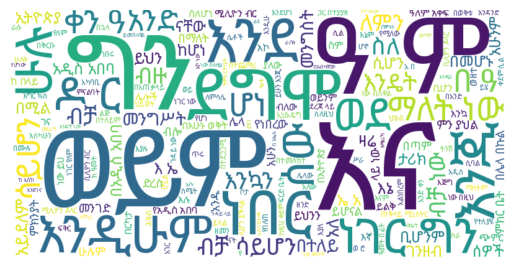

In [ ]:
font_path = "/content/NotoSansEthiopic-Regular.ttf"

wc = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(tokens))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


After stop word removal

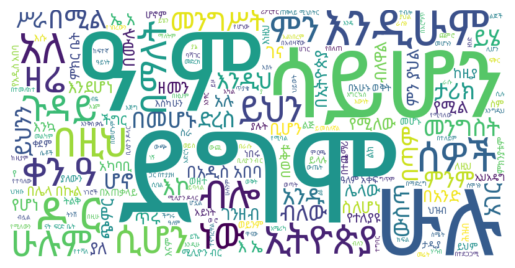

In [ ]:
font_path = "/content/NotoSansEthiopic-Regular.ttf"

wc = WordCloud(
    font_path=font_path,
    width=800,
    height=400,
    background_color='white'
).generate(' '.join(filtered_tokens))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# **1.6 Sentence Probability**

In [ ]:
def sentence_probability(sentence_tokens, freq_bigram, freq_unigram):
    p = 1
    for i in range(1, len(sentence_tokens)):
        bg = (sentence_tokens[i-1], sentence_tokens[i])
        if freq_bigram[bg] == 0:
            p *= 1e-6
        else:
            p *= freq_bigram[bg] / freq_unigram[(sentence_tokens[i-1],)]
    return p

sent = "ኢትዮጵያ ታሪካዊ ሀገር ናት".split()
sentence_probability(sent, freq_2, freq_1)

1.2357444160707835e-12

# **1.7 Random Sentence Generation**

In [ ]:
import random
from collections import defaultdict

# 1. Build N-gram Model
def build_ngram_model(tokens, n):
    model = defaultdict(list)

    for i in range(len(tokens) - n):
        key = tuple(tokens[i:i+n])
        next_word = tokens[i+n]
        model[key].append(next_word)

    return model


# 2. Generate sentence using n-grams
def generate_sentence(model, n, length=12):
    start = random.choice(list(model.keys()))
    sentence = list(start)

    for _ in range(length):
        state = tuple(sentence[-n:])
        if state in model:
            sentence.append(random.choice(model[state]))
        else:
            break

    return " ".join(sentence)


# 3. Show how output changes as n increases
def demo_ngram_progression(tokens):
    for n in [1, 2, 3, 4, 5]:
        model = build_ngram_model(tokens, n)
        sentence = generate_sentence(model, n)

        print(f"{n}-GRAM GENERATED SENTENCE")
        print(sentence)

        # Explanation of behavior
        if n == 1:
            print("\nExplanation:")
            print("- n=1 means the model only knows single words.")
            print("- The sentence looks random and often meaningless.")
        elif n == 2:
            print("\nExplanation:")
            print("- n=2 means the model knows pairs of words.")
            print("- Sentences make a little more sense but still feel simple.")
        elif n == 3:
            print("\nExplanation:")
            print("- n=3 means the model uses the previous 2 words for context.")
            print("- Sentences become more natural and grammatical.")
        elif n == 4:
            print("\nExplanation:")
            print("- n=4 gives even more context.")
            print("- Generated sentences start resembling real text.")
        elif n >= 5:
            print("\nExplanation:")
            print("- n=5 or higher means the model remembers long word patterns.")
            print("- Sentences become very similar to the original dataset.")
            print("- The model becomes less random and more deterministic.")


# 4. Example usage
# Replace this with your real token list:
tokens = "እኔ ቤት እየሄድኩ ነበር እኔ ምግብ እበላ ነበር".split()

demo_ngram_progression(tokens)


1-GRAM GENERATED SENTENCE
ምግብ እበላ ነበር እኔ ምግብ እበላ ነበር እኔ ምግብ እበላ ነበር እኔ ምግብ

Explanation:
- n=1 means the model only knows single words.
- The sentence looks random and often meaningless.
2-GRAM GENERATED SENTENCE
እኔ ቤት እየሄድኩ ነበር እኔ ምግብ እበላ ነበር

Explanation:
- n=2 means the model knows pairs of words.
- Sentences make a little more sense but still feel simple.
3-GRAM GENERATED SENTENCE
ቤት እየሄድኩ ነበር እኔ ምግብ እበላ ነበር

Explanation:
- n=3 means the model uses the previous 2 words for context.
- Sentences become more natural and grammatical.
4-GRAM GENERATED SENTENCE
እየሄድኩ ነበር እኔ ምግብ እበላ ነበር

Explanation:
- n=4 gives even more context.
- Generated sentences start resembling real text.
5-GRAM GENERATED SENTENCE
እየሄድኩ ነበር እኔ ምግብ እበላ ነበር

Explanation:
- n=5 or higher means the model remembers long word patterns.
- Sentences become very similar to the original dataset.
- The model becomes less random and more deterministic.


# **2. Intrinsic Evaluation (Perplexity)**

In [ ]:
import math

def perplexity(tokens, freq_bigram, freq_unigram, k=1e-6):
    N = len(tokens)
    log_sum = 0

    for i in range(1, N):
        prev_word = (tokens[i-1],)
        bg = (tokens[i-1], tokens[i])

        # count of bigram and unigram
        c_bg = freq_bigram.get(bg, 0)
        c_uni = freq_unigram.get(prev_word, 0)

        # Laplace-style smoothing
        prob = (c_bg + k) / (c_uni + k * len(freq_unigram))

        log_sum += math.log(prob)

    return math.exp(-log_sum / N)


In [ ]:
ppl = perplexity(tokens, freq_2, freq_1)
print("Perplexity:", ppl)

Perplexity: 7992.431330414441


# **3. Extrinsic Evaluation**

In [ ]:
from collections import Counter

train_tokens = tokens
test_tokens  = filtered_tokens

# Build bigram frequency
freq_2 = Counter()
for i in range(len(train_tokens)-1):
    freq_2[(train_tokens[i], train_tokens[i+1])] += 1

freq_1 = Counter((token,) for token in train_tokens)

# Extrinsic evaluation: next-word prediction accuracy
correct = 0
total = 0

for i in range(len(test_tokens)-1):
    prev = test_tokens[i]
    actual_next = test_tokens[i+1]

    # Candidates: all bigrams starting with 'prev'
    candidates = [(bg[1], count) for bg, count in freq_2.items() if bg[0] == prev]

    if candidates:
        # pick the most frequent next word
        predicted = max(candidates, key=lambda x: x[1])[0]
    else:
        # fallback: predict the most frequent unigram
        predicted = freq_1.most_common(1)[0][0]

    total += 1
    if predicted == actual_next:
        correct += 1

accuracy = correct / total if total > 0 else 0
print("Next-word prediction accuracy:", accuracy)


Next-word prediction accuracy: 7.412419713070792e-07
